1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Data Manipulation](#Data_Manipulation)
    - 3.3 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.4 - [Statistical Summary](#Statistical_Summary)
4. **[EDA](#EDA)**    
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Bivariate Analysis](#Bivariate_Analysis)
    - 4.3 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.4 - [Conclusion of EDA](#Conclusion_of_EDA)
5. **[Label Encoding for categorical Variable](#Label_Encoding_for_categorical_Variable)**
6. **[Feature Selection](#feature_selection)**
7. **[Standardise Data](#Standardise_Data)**
8. **[ML Models](#ML_Models)**
    - 8.1 - [Naive Bayes](#Naive_Bayes) 
    

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Machine learning\\NEW DATASET\\Analytics Vidhya\\3rd_June_ Jobathon'

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_sample=pd.read_csv('sample_submission.csv')
df_train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0


In [4]:
df_test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0


In [5]:
df=pd.concat([df_train,df_test])
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,NaN
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52345.0,26173.000000,15110.844257,1.0,13087.0,26173.0,39259.0,52345.0
campaign_var_1,52345.0,6.826211,3.543873,1.0,4.0,6.0,9.0,16.0
campaign_var_2,52345.0,6.828198,2.711333,1.0,5.0,7.0,9.0,15.0
products_purchased,23298.0,2.144347,0.780816,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,52345.0,0.396714,0.508333,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,52345.0,0.006094,0.077828,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,52345.0,0.102952,0.303899,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,52345.0,0.010373,0.101322,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,52345.0,0.151896,0.359933,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,52345.0,0.506295,0.560053,0.0,0.0,0.0,1.0,3.0


In [9]:
df.describe(include=object).T

,count,unique,top,freq
created_at,52345,454,2021-12-26,181
signup_date,30583,1819,2022-03-06,55


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

# 2. EDA

### 2.1 Treating Nulls 

In [11]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
products_purchased,29047,55.491451
signup_date,21762,41.574171
buy,13184,25.186742
user_activity_var_6,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000


#### Treating the nulls of Product_purchased column

In [12]:
df.shape

(52345, 19)

In [13]:
df.created_at.value_counts()

2021-12-26    181
2021-12-09    180
2021-12-07    179
2021-12-21    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 454, dtype: int64

In [14]:
# grouping the products bt Lead Dropping Date
from scipy.stats import mode
med_products=df.pivot_table(values='products_purchased',index='created_at',aggfunc=np.median)
med_products

,products_purchased
created_at,
2021-01-01,2.0
2021-01-02,2.0
2021-01-03,2.0
2021-01-04,2.0
2021-01-05,3.0
...,...
2022-03-26,2.0
2022-03-27,2.0
2022-03-28,2.0


In [15]:
prod_bool=df.products_purchased.isnull()
df.loc[prod_bool,'products_purchased']=df.loc[prod_bool,'created_at'].apply(lambda x:med_products.loc[x])

In [16]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
signup_date,21762,41.574171
buy,13184,25.186742
user_activity_var_5,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000
user_activity_var_6,0,0.000000


#### Treating the nulls of Signup_date column

In [17]:
# grouping 'signup_date' values using 'created_at'column
mode_sign=df.pivot_table(values='signup_date',index='created_at',aggfunc=lambda x:mode(x).mode[0])
mode_sign


,signup_date
created_at,
2021-01-01,2021-10-20
2021-01-02,2021-02-10
2021-01-03,2020-08-09
2021-01-04,2021-04-06
2021-01-05,2019-12-11
...,...
2022-03-26,2022-03-06
2022-03-27,2021-11-25
2022-03-28,2021-06-05


In [18]:
s_bool=df['signup_date'].isnull()
df.loc[s_bool,'signup_date']=df.loc[s_bool,'created_at'].apply(lambda x:mode_sign.loc[x])

In [19]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
buy,13184,25.186742
user_activity_var_5,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000
user_activity_var_6,0,0.000000
id,0,0.000000


** so we have finally Treated the required Nulls and
only nulls of 'Buy' column are there which exists for test datast only**

### 2.2 Checking and visualizing the outliers

<AxesSubplot:>

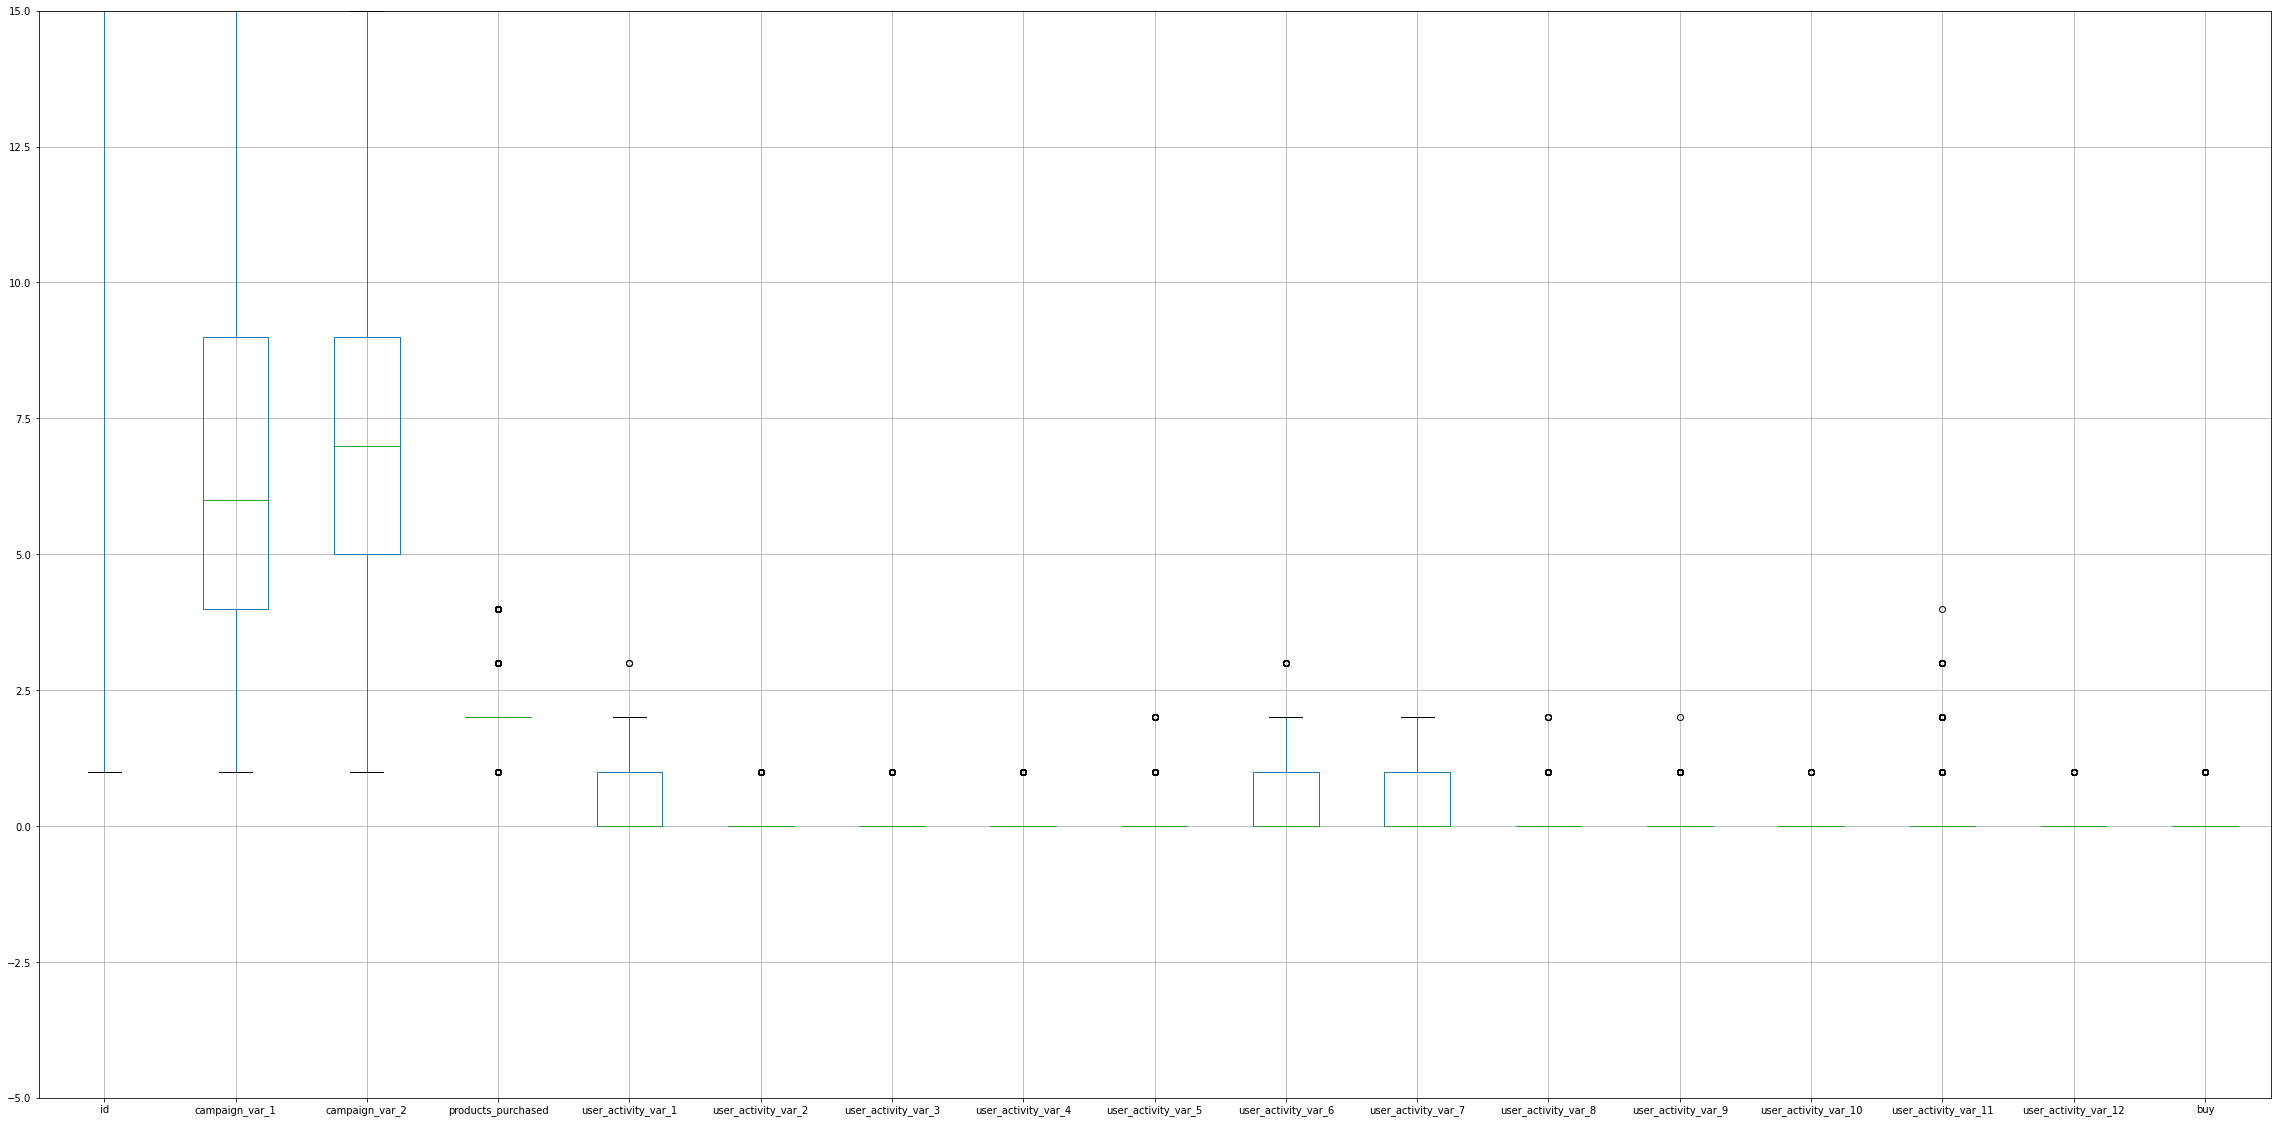

In [20]:
plt.figure(figsize=(40,20))
plt.ylim(-5,15)
df.boxplot()

### Distribution of Numeric Variables 

## 3.Final treated Dataset

In [21]:
#treated nulls and feature engineered train test data

df_train_final=df[~df['buy'].isnull()]
train=df_train_final

df_test_final=df[df['buy'].isnull()]
test=df_test_final.drop(['buy','created_at','signup_date'],axis=1)


In [22]:
train.shape,df.shape

((39161, 19), (52345, 19))

In [23]:
train.shape,test.shape

((39161, 19), (13184, 16))

In [24]:
# Dropping the unrequired columns i 

#Train Datasets
x_tr=train.drop(['buy','created_at','signup_date'],axis=1)
y_tr=train['buy']


### Handling Unbalanced Data using SMOTE

In [25]:
# Checking the balance of target variable
df_train.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

** so we see that it is unbalanced data so we try to balance using SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as split

smote=SMOTE()
x_resamp,y_resamp=smote.fit_resample(x_tr,y_tr.ravel())


In [27]:
y_resamp

array([0., 0., 0., ..., 1., 1., 1.])

#### Standardizing the Data for ML MOdel

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_resamp_sc=sc.fit_transform(x_resamp)


In [29]:
x_train,x_test,y_train,y_test=split(x_resamp_sc,y_resamp,random_state=100,test_size=0.25)

In [30]:
# pca 
'''
from sklearn.decomposition import PCA

pca=PCA(0.95,random_state=1)

principalComponents = pca.fit_transform(x_resamp_sc)

principalDf = pd.DataFrame(data = principalComponents,columns=['PCA'+' '+str(i) for i in range(principalComponents.shape[1])])



# Splitting the Train Dataests into internal Train,Test data
x_train,x_test,y_train,y_test=split(principalDf,y_resamp,random_state=100,test_size=0.25)
'''

"\nfrom sklearn.decomposition import PCA\n\npca=PCA(0.95,random_state=1)\n\nprincipalComponents = pca.fit_transform(x_resamp_sc)\n\nprincipalDf = pd.DataFrame(data = principalComponents,columns=['PCA'+' '+str(i) for i in range(principalComponents.shape[1])])\n\n\n\n# Splitting the Train Dataests into internal Train,Test data\nx_train,x_test,y_train,y_test=split(principalDf,y_resamp,random_state=100,test_size=0.25)\n"

 Splitting the Train Dataests into internal Train,Test data
x_train,x_test,y_train,y_test=split(x_resamp,y_resamp,random_state=100,test_size=0.25)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

### Score Card

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix

In [32]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])



def updateScoreCard(model_name):
    global score_card
    
    score_card = score_card.append({'Model': model_name,
                                        'Precision Score': metrics.precision_score(y_test,test_pred),
                                        'Recall Score': metrics.recall_score(y_test,test_pred),
                                        'Accuracy Score': metrics.accuracy_score(y_test,test_pred),
                                        'f1-score': metrics.f1_score(y_test,test_pred)}, 
                                        ignore_index = True)
    return(score_card)

### 4.1  Feature Selection with Random Forest Model

#### Base Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc =RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [35]:

# Fitting the Model
rfc.fit(x_train,y_train)
# Model Predict
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

#score
getscore=updateScoreCard('Random Forest Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609


In [36]:

ImpFeatures=pd.DataFrame(columns=['colname','count'])
ImpFeatures['colname']=x_tr.columns
ImpFeatures['count']=rfc.feature_importances_
ImpFeatures.sort_values(by='count',ascending=False)

,colname,count
0,id,0.271038
3,products_purchased,0.130634
2,campaign_var_2,0.128812
1,campaign_var_1,0.104835
11,user_activity_var_8,0.086953
10,user_activity_var_7,0.076687
9,user_activity_var_6,0.059546
14,user_activity_var_11,0.036536
4,user_activity_var_1,0.027000
6,user_activity_var_3,0.024869


### Important Features Selected

In [37]:

Impf=ImpFeatures[ImpFeatures['count']>0.05]
Impf.colname

0                      id
1          campaign_var_1
2          campaign_var_2
3      products_purchased
9     user_activity_var_6
10    user_activity_var_7
11    user_activity_var_8
Name: colname, dtype: object

In [38]:
x_resamp[Impf.colname]

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_6,user_activity_var_7,user_activity_var_8
0,1,1,2,2.000000,0,1,1
1,2,2,1,2.000000,0,1,0
2,3,9,3,3.000000,0,0,0
3,4,6,7,2.000000,0,0,0
4,5,4,6,2.000000,0,1,0
...,...,...,...,...,...,...,...
74321,5953,3,6,2.334315,0,0,0
74322,10173,2,3,2.000000,0,0,0
74323,14253,1,3,3.000000,0,0,0
74324,32732,6,5,2.000000,0,0,0


In [39]:

x_resamp_imp=x_resamp[Impf.colname]

#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_resamp_imp_sc=sc.fit_transform(x_resamp_imp)

In [40]:

# splitting the Scaled important columns of resamp data
x_train,x_test,y_train,y_test=split(x_resamp_imp_sc,y_resamp,random_state=100,test_size=0.25)

# 4. Model Building

### 4.1 LogisticRegression

In [41]:
from sklearn.linear_model import  LogisticRegression

In [42]:
# Fitting the Model
LrModel=LogisticRegression()

LrModel.fit(x_train,y_train)

# Model Predict
train_pred=LrModel.predict(x_train)
test_pred=LrModel.predict(x_test)

#score
getscore=updateScoreCard('Logistic Regression')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658


## 4.2 Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()

# Fitting the Model
DCT.fit(x_train,y_train)
# Model Predict
train_pred=DCT.predict(x_train)
test_pred=DCT.predict(x_test)

getscore=updateScoreCard('Decision Tree Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336


Previous


Model	Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	0.918679	0.933948	0.925358	0.926251

## 4.3 Random Forest 

#### Base Model

In [44]:
# Fitting the Model
rfc.fit(x_train,y_train)
# Model Predict
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

#score
getscore=updateScoreCard('Random Forest Base')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336
3,Random Forest Base,0.885153,0.923118,0.901302,0.903737


#### hypertuning the parameters using GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

params={ 'max_depth':[5,10,15,20,30],'max_features': [6, 8, 10, 12,15],'n_estimators':[100,150,200]}
grid_model=GridSearchCV(estimator=rfc, param_grid=params, cv=4, n_jobs=-1,scoring ='accuracy')

In [46]:
# Fitting the Model
grid_model.fit(x_train,y_train)

#best Estimator
grid_best_RF=grid_model.best_estimator_
grid_best_RF

RandomForestClassifier(max_depth=30, max_features=6, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [47]:
# Model Predict
train_pred=grid_best_RF.predict(x_train)
test_pred=grid_best_RF.predict(x_test)

In [48]:
getscore=updateScoreCard('Random Forest Best Estimator ID')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336
3,Random Forest Base,0.885153,0.923118,0.901302,0.903737
4,Random Forest Best Estimator ID,0.89289,0.94124,0.913841,0.916427


Previous1

Model	Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	0.918679	0.933948	0.925358	0.926251
3	Random Forest Best Estimator ID Random	0.925749	0.954536	0.938758	0.939922

Recent Previous 2

Model	                Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression       	0.792101	0.830152	0.805403	0.810681
1	Decision Tree Base	          0.86114	0.894381	0.87461 	0.877446
2	Random Forest Base	         0.898564	0.919472	0.907491	0.908898
3	Random F Best Esor ID    	0.893209	0.923762	0.906307	0.908228

## 4.3 Boosting Models

#### XGB Base Model

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb=XGBClassifier(objective='reg:logistic',use_label_encoder =False)

In [51]:
# Fitting the Model
xgb.fit(x_train,y_train)
# Model Predict
train_pred=xgb.predict(x_train)
test_pred=xgb.predict(x_test)

#Score Card
getscore=updateScoreCard('XGB Base')
getscore


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336
3,Random Forest Base,0.885153,0.923118,0.901302,0.903737
4,Random Forest Best Estimator ID,0.89289,0.94124,0.913841,0.916427
5,XGB Base,0.882914,0.903174,0.891293,0.892929


ptrevious ID

Model	                                     Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression                     	0.792329	0.828437	0.804919	0.809981
1	Random Forest Base	                        0.918679	0.933948	0.925358	0.926251
2	Random Forest Base	                        0.918679	0.933948	0.925358	0.926251
3	Random Forest Best Estimator ID Random   	0.925749	0.954536	0.938758	0.939922
4	Random Forest Base	                        0.919662	0.910787	0.915294	0.915203
5	XGB Base	                                0.919662	0.910787	0.915294	0.915203

Previous ID Scaled

Model	                            Precision Score 	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	                   0.792101	    0.830152	0.805403	0.810681
1	Decision Tree Base	                     0.86114	0.894381	0.87461	    0.877446
2	Random Forest Base                   	0.898564	0.919472	0.907491	0.908898
3	Random Forest Best Estimator ID Random	0.893209	0.923762	0.906307	0.908228
4	XGB Base	                            0.856665	0.878619	0.8653	    0.867503

#### Hypertuning the model

In [52]:
params={ 'max_depth':[5,10,15,20,30],'max_features': [6, 8, 10, 12],'n_estimators':[100,150,200,275]}
grid_model=GridSearchCV(estimator=xgb, param_grid=params, cv=5, n_jobs=-1,scoring ='accuracy')

In [53]:
# Fitting the Model
grid_model.fit(x_train,y_train)

#best Estimator
grid_best_XGB=grid_model.best_estimator_
grid_best_XGB

[13:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_features=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=275, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', predictor='auto', random_state=0, ...)

In [54]:
# Model Predict
train_pred=grid_best_XGB.predict(x_train)
test_pred=grid_best_XGB.predict(x_test)

In [55]:
getscore=updateScoreCard('XGBoost MOdel Best Estimator_ID')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336
3,Random Forest Base,0.885153,0.923118,0.901302,0.903737
4,Random Forest Best Estimator ID,0.89289,0.94124,0.913841,0.916427
5,XGB Base,0.882914,0.903174,0.891293,0.892929
6,XGBoost MOdel Best Estimator_ID,0.928721,0.951426,0.938973,0.939936


''
Model	                                Precision Score  	Recall Score	Accuracy Score	f1-score
0	Random Forest Base	                     0.916248        	0.938452	    0.926057	0.927217
1	Logistic Regression	                    0.791577	        0.830367	    0.805134	0.810508
2	Decision Tree Base	                     0.909278	        0.94896	        0.926865	0.928695
3	Random Forest Base	                    0.916248            0.938452	    0.926057	0.927217
4	Random Forest Best Estimator ID     	0.92506	            0.958289	    0.940103	0.941381
5	XGB Base	                            0.917334	        0.909071	    0.913249	0.913184
6	XGBoost MOdel Best Estimator_ID	         0.951779	        0.969333	    0.959961	0.960476
''

1st run
Model                 	Precision Score	 Recall Score	Accuracy Score	f1-score
0	Logistic Regression	            0.808018	0.747802	0.784254	0.776744
1	Random Forest Best Estimator	0.879615	0.911967	0.893176	0.895499
2	XGBoost MOdel Best Estimator	0.879816	0.923118	0.898127	0.900947
3	Deep Neural Network          	0.866594	0.853957	0.860725	0.860229

2nd run

	Model	                 Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	             0.80728	0.742012	0.781617	0.773271
1	Random Forest Best Estimator	0.877193	0.906069	0.889194	0.891397
2	Random Forest Best Estimator	0.879554	0.905962	0.890539	0.892563
3	Random Forest Best Estimator	0.877461	0.917542	0.894306	0.897054
4	XGBoost MOdel Best Estimator	0.881333	0.915827	0.895867	0.898249

### 4.4 Deep Learing Models

In [56]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

In [57]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [58]:
x_train.shape,y_train.shape

((55744, 7), (55744,))

In [59]:
# building a linear stack of layers with the sequential model
model = Sequential()


# hidden layer
model.add(Dense(128, kernel_initializer = "uniform",activation = "relu", input_dim=7))
model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))


# output layer
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

In [60]:
# looking at the model summary
model.summary()

# compiling the sequential model
model.compile(optimizer= 'adam',loss= "binary_crossentropy", metrics= ['accuracy'])


# Early Stopping Callback
earlystopping = EarlyStopping(monitor='val_loss', patience=5)


# training the model for 100 epochs
h_callback = model.fit(x_train, y_train, batch_size = 16, epochs = 100, validation_data=(x_test, y_test), callbacks=[earlystopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3484/3484 [===========================

In [61]:
model.evaluate(x_test, y_test)

581/581 [==============================] - 0s 561us/step - loss: 0.3388 - accuracy: 0.8341


[0.3388490080833435, 0.8340867757797241]

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
test_pred = model.predict(x_test)
test_pred = np.round(test_pred)
cm = confusion_matrix(y_test, test_pred)
print(cm)
## Classification Report
print(classification_report(y_test, test_pred))

581/581 [==============================] - 0s 567us/step
[[7253 2003]
 [1080 8246]]
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      9256
         1.0       0.80      0.88      0.84      9326

    accuracy                           0.83     18582
   macro avg       0.84      0.83      0.83     18582
weighted avg       0.84      0.83      0.83     18582



In [64]:
getscore=updateScoreCard('Deep Neural Network')
getscore

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest Base,0.918348,0.937058,0.926596,0.927609
1,Logistic Regression,0.738773,0.818465,0.763642,0.77658
2,Decision Tree Base,0.883638,0.93234,0.904424,0.907336
3,Random Forest Base,0.885153,0.923118,0.901302,0.903737
4,Random Forest Best Estimator ID,0.89289,0.94124,0.913841,0.916427
5,XGB Base,0.882914,0.903174,0.891293,0.892929
6,XGBoost MOdel Best Estimator_ID,0.928721,0.951426,0.938973,0.939936
7,Deep Neural Network,0.804566,0.884195,0.834087,0.842503


Previous 1st run
getscore=updateScoreCard('Deep Neural Network')
getscore
Model	                       Precision Score	Recall Score	Accuracy Score	f1-score
0	Logistic Regression	            0.808018	0.747802	    0.784254	0.776744
1	Random Forest Best Estimator	0.879615	0.911967	    0.893176	0.895499
2	XGBoost MOdel Best Estimator	0.879816	0.923118	    0.898127	0.900947
3	Deep Neural Network	            0.866594	0.853957    	0.860725    0.860229

In [65]:
x_tr.shape,test.shape

((39161, 16), (13184, 16))

In [66]:
'x_tr[Impf.colname]'

'x_tr[Impf.colname]'

In [67]:
'test[Impf.colname]'

'test[Impf.colname]'

#### Creating Submission file

In [99]:
#Best test Prediction with Best Model trained with full trained data

#fitting the model with full train data
xgb.fit(x_tr,y_tr)

#predicting the model with full test data
best_pred=xgb.predict(test)

In [107]:
#test=test.drop('buy',axis=1)

In [101]:
test['buy']=best_pred
test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,39162,2,2,2.0,1,1,0,0,0,1,0,0,0,0,1,0,1
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,39164,8,7,2.0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,1
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,16,12,2.0,0,0,0,0,0,1,1,0,0,0,0,0,0
13180,52342,12,8,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0
13181,52343,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0
13182,52344,14,10,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [102]:
submission_files=pd.DataFrame()
submission_files['id']=test.loc[:,"id"]
submission_files["buy"]=test.loc[:,"buy"]
submission_files

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [103]:
submission_files =submission_files.reset_index(drop=True)
submission_files

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [104]:
df_sample

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1
...,...,...
13179,52341,1
13180,52342,1
13181,52343,1
13182,52344,1


In [105]:
#converting to csv file format
submission_files.to_csv('Smart_Lead_Scoring_Engine19_ImpFeat.csv', index = False)

In [106]:
pd.read_csv('Smart_Lead_Scoring_Engine19_ImpFeat.csv')

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


# Results

Surprisingly, the best model IS NOT the deep neural network. Instead it's the XGBoostClassifier and RandomForest. I would have initially picked it out to be the second best one out of the lot. This speaks to it's power as a model and also to the fact that training deep neural networks is challenging and a lot of the time it seems that you're better off choosing a simpler model.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 



In [77]:
def getBestParams(model,x,y):
    
    tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25],
                     'n_estimators':[100,150,200]}]
    grid = GridSearchCV(estimator = model, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
    
    gridModel=grid.fit(x,y)
    
    return gridModel



bestParams=getBestParams(RandomForestClassifier(),x_train_sc,y_train)
            
print(bestParams.best_params_)

In [79]:
'x_tr[Impf.colname]''

SyntaxError: EOL while scanning string literal (3001550872.py, line 1)

In [ ]:
'x_resamp[Impf.colname]'

In [ ]:
len(y_resamp)

In [ ]:
'x_train,x_test,y_train,y_test=split(x_resamp[Impf.colname],y_resamp,random_state=100,test_size=0.25)'

In [ ]:
def BuildModel(x,y):
    accuracy=[]
    f1score=[]
    models=[]
    models.append(LogisticRegression())
    models.append(KNeighborsClassifier())
    models.append(SVC(random_state=40))
    models.append(RandomForestClassifier(random_state=40))
    models.append(GradientBoostingClassifier(random_state=40))
    models.append(XGBClassifier(random_state=40, verbosity=0))
    models.append(DecisionTreeClassifier())
    models.append(GaussianNB())
    
    
    for model in models:
        
        
        
        model.fit(x,y)
        test_pred=model.predict(x_test)
            
            
            
        
        print(f'Model: {model}\n')
        
        print('\n Classification Report : \n ')
        
        print(classification_report(y_test, test_pred))
        
        print('\n')
        
        print(f'Model: {model}\nAccuracy: {accuracy_score(y_test, test_pred)}\nF1-score: {f1_score(y_test, test_pred)}\n\n')


# Model Building        
BuildModel(x_train,y_train)